# Classification algorithms with sklearn 

In [1]:
%load_ext autoreload
%autoreload 2
import os
# %matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
##### GOOGLE COLAB ######
if not os.path.exists('./plot_metrics.py'):
    ! wget https://raw.githubusercontent.com/davidggphy/2019_03_Curso_IFT/master/notebooks/01_classification/plot_metrics.py
if not os.path.exists('./img'):
    ! mkdir img
if not os.path.exists('./img/precisionrecall.png'):
    ! wget https://github.com/davidggphy/2019_03_Curso_IFT/raw/master/notebooks/01_classification/img/precisionrecall.png
    ! mv precisionrecall.png img/precisionrecall.png

In [3]:
from plot_metrics import plot_confusion_matrix
from plot_metrics import plot_roc_curve
from plot_metrics import plot_probability_map

# Binary case

## Metrics for a binary classification problem

More info in:

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [100]:
%%html
<img src="img/precisionrecall.png" width='400' height='100'>

## Creating the dataset

In [7]:
dic_data_A = {'n': 100 ,'mean': (0,2), 'cov' :((1,0),(0,2)), 'y' : 0 }  # RED
dic_data_B = {'n': 120 ,'mean': (0,0), 'cov' :((3,0),(0,1)), 'y' : 1 }  # BLUE
dic_data = {'A': dic_data_A, 'B' : dic_data_B }

# We sample the points with numpy.random
np.random.seed(1)
samples = {key : np.random.multivariate_normal(dic['mean'], np.array(dic['cov']), dic['n']) 
           for key,dic in dic_data.items()}
     
X = np.concatenate(tuple(samples[key] for key in dic_data.keys() ),axis=0)
Y = np.concatenate(tuple(dic['y']* np.ones(dic['n'], dtype='int') 
                         for key,dic in dic_data.items() ), axis=0)

# Train Val Test Split. 70% / 15% / 15%.
X_train,X_val,Y_train, Y_val = train_test_split(X,Y,test_size = 0.3)
X_val,X_test,Y_val, Y_test = train_test_split(X_val,Y_val,test_size = 0.5)

# We transform into coordinates in the plane to make plotting easier.
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(Y_train,dtype='int')]
]
colors_val = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(Y_val,dtype='int')]
]
colors_test = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(Y_test,dtype='int')]
]
x0_range = (X[:,0].min()-1,X[:,0].max()+1)
x1_range = (X[:,1].min()-1,X[:,1].max()+1)
x0 = X_train[:,0] 
x1 = X_train[:,1] 
x0_val = X_val[:,0] 
x1_val = X_val[:,1] 
x0_test = X_test[:,0] 
x1_test = X_test[:,1] 

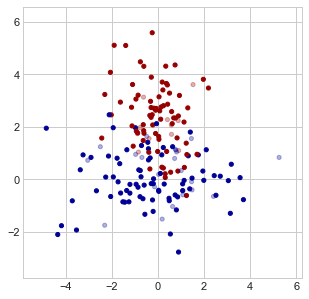

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
# TRAIN
ax.scatter(x0, x1, s = 17, 
          alpha=1, c=colors )
# VALIDATION
ax.scatter(x0_val, x1_val, s = 17, 
          alpha=0.3, c=colors_val )

ax.figure.canvas.draw()

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)
# print('TRAIN SET\n---------\n',sklearn.metrics.classification_report(Y_train,clf.predict(X_train)))
# print('TEST SET\n--------\n',sklearn.metrics.classification_report(Y_val,clf.predict(X_val)))

In [14]:
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

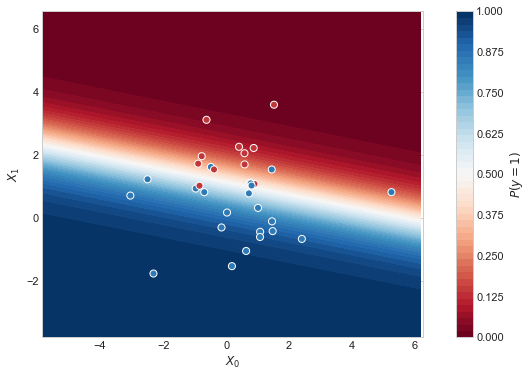

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

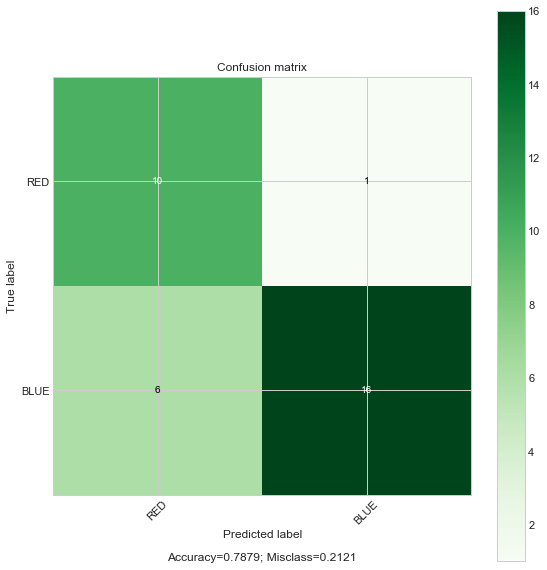

In [17]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(8,8))

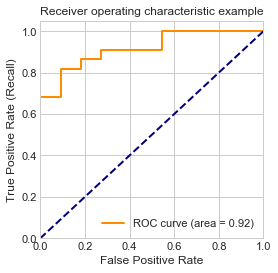

In [18]:
plot_roc_curve(Y_val,Y_val_probs)

## Decission Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)

In [31]:
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

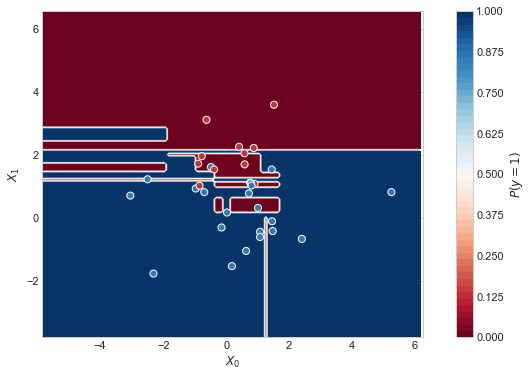

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

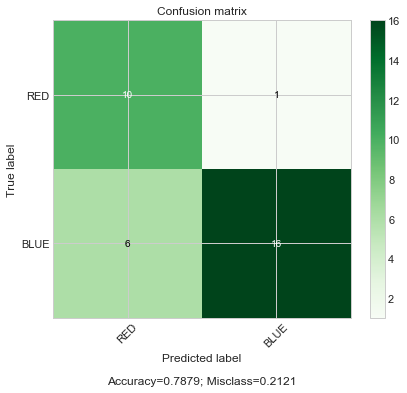

In [23]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(6,5))

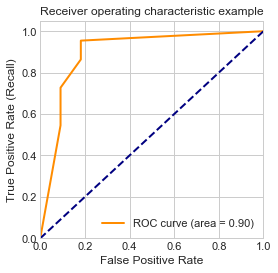

In [24]:
plot_roc_curve(Y_val,Y_val_probs)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5).fit(X_train, Y_train)
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

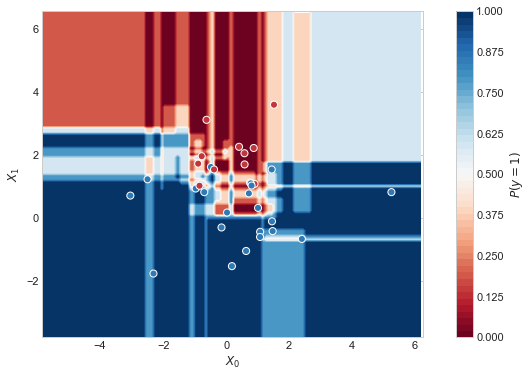

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

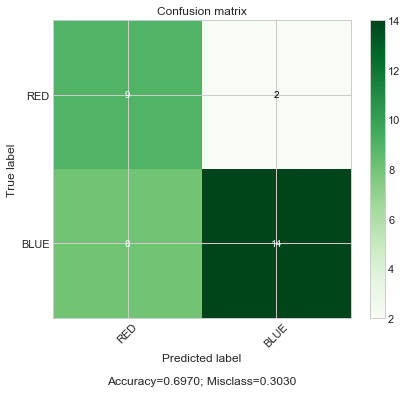

In [41]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(6,5))

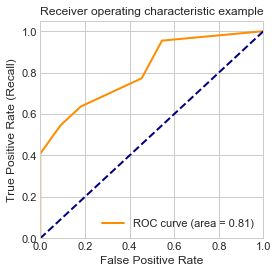

In [42]:
plot_roc_curve(Y_val,Y_val_probs)

## Adaboost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
clf = AdaBoostClassifier(n_estimators=50).fit(X_train, Y_train)
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

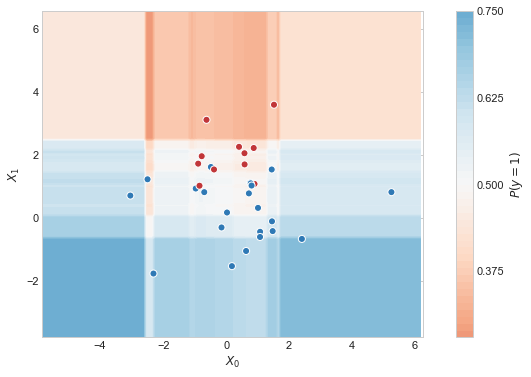

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

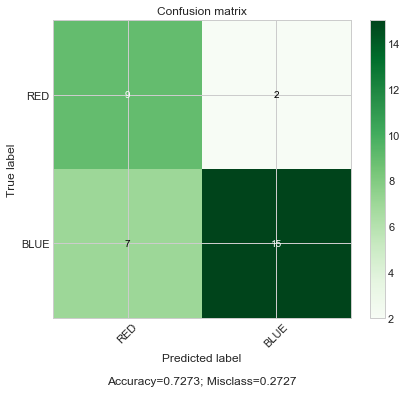

In [48]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(6,5))

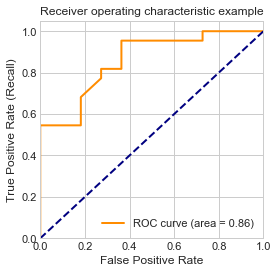

In [49]:
plot_roc_curve(Y_val,Y_val_probs)

## K-nearest neighbors KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 8, weights='distance').fit(X_train, Y_train)
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

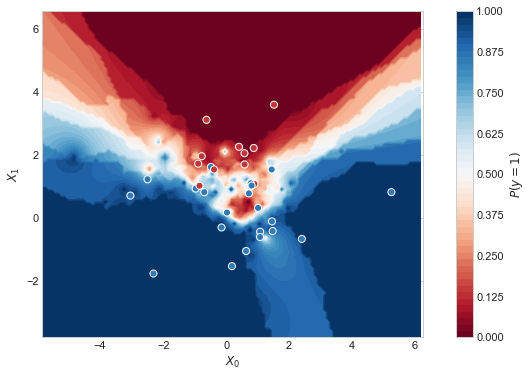

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

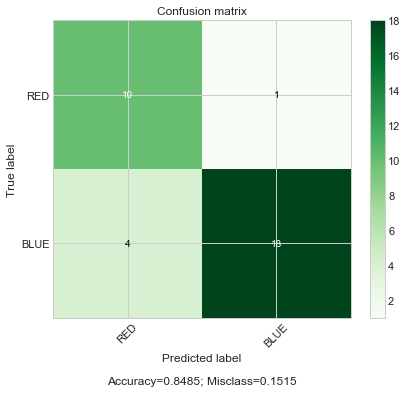

In [57]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(6,5))

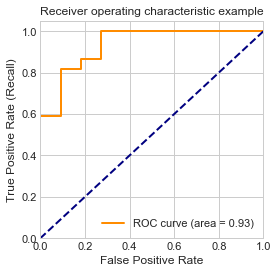

In [59]:
plot_roc_curve(Y_val,Y_val_probs)

## Naive Bayes

In [60]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB().fit(X_train, Y_train)
Y_val_probs = clf.predict_proba(X_val)[:,1]
Y_val_pred = clf.predict(X_val)

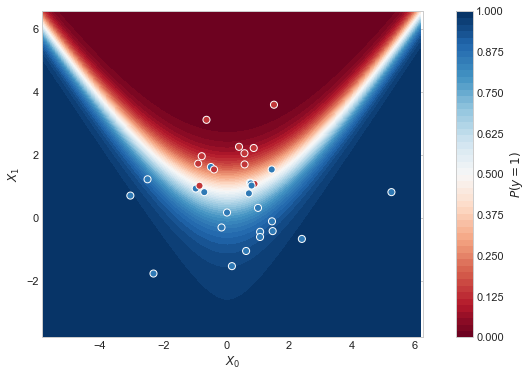

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_probability_map(clf,fig,ax,x0_range,x1_range)
ax.scatter(X_val[:,0], X_val[:, 1], c=Y_val[:], s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

ax.figure.canvas.draw()

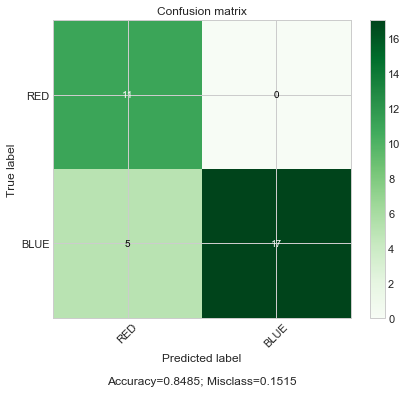

In [63]:
confusion_matrix = metrics.confusion_matrix(Y_val,Y_val_pred)
plot_confusion_matrix(confusion_matrix,target_names=['RED','BLUE'],normalize=False, cmap=plt.cm.Greens,figsize=(6,5))

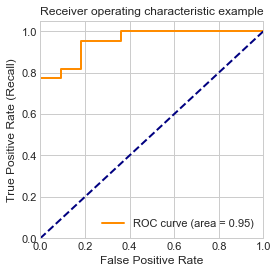

In [64]:
plot_roc_curve(Y_val,Y_val_probs)

## EXERCISE

We have not normalized / standarized the data. Check how the metrics change if you do so. Implement a proper preprocessing and reapply the classifiers.

Hint: 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Hint 2:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## EXERCISE

Try, at least for one algorithm, to tune the hyperparameters to maximize the area under the ROC curve (AUC score).

Why do we have a test set that we haven't used?

## EXERCISE

Try the same examples with an unbalance dataset. For example, set:
`npointsA = 100`
`npointsB = 900`

What happens to each classifier. What do you observe in the confusion matrix? Are all the classifiers affected in the same way?

What would you do if it is more important to correctly classify class A than B?

What is the minimal accuracy you would expect for a naive classifier?

## EXERCISE

With the next dataset, that it is clearly non-linearly separable, what methods do you think are more appropriate to classify it? 

Do you have any idea to can apply logistic regression to it?

Try different methods and compare the metrics.

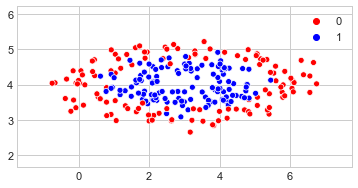

In [47]:
from utils import generate_concentric_dataset
X, Y = generate_concentric_dataset(250)
x0_range = (X[:,0].min()-1,X[:,0].max()+1)
x1_range = (X[:,1].min()-1,X[:,1].max()+1)
ax = plt.axes()
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
sns.scatterplot(x= X[:,0], y=X[:,1],hue=Y,palette=['red','blue'])
ax.set_aspect('equal')

# Three classes

In [65]:
dic_data_A = {'n': 100 ,'mean': (0,2), 'cov' :((1,0),(0,2)), 'y' : 0 }  # RED
dic_data_B = {'n': 50 ,'mean': (-2,0), 'cov' :((3,0),(0,1)), 'y' : 1 }  # GREEN
dic_data_C = {'n': 50 ,'mean': (2,0), 'cov' :((3,0),(0,1)), 'y' : 2 }  # BLUE
dic_data = {'A': dic_data_A, 'B' : dic_data_B , 'C' : dic_data_C}
 
# We sample the points with numpy.random
np.random.seed(1)
samples = {key : np.random.multivariate_normal(dic['mean'], np.array(dic['cov']), dic['n']) 
           for key,dic in dic_data.items()}
     
X = np.concatenate(tuple(samples[key] for key in dic_data.keys() ),axis=0)
Y = np.concatenate(tuple(dic['y']* np.ones(dic['n'], dtype='int') 
                         for key,dic in dic_data.items() ), axis=0)



# Train Test Split. 80% / 20%.
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


# We transform into coordinates in the plane to make plotting easier.
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 200*np.eye(3)[np.array(Y_train,dtype='int')]
]
colors_test = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 200*np.eye(3)[np.array(Y_test,dtype='int')]
]
x0_range = (X[:,0].min()-1,X[:,0].max()+1)
x1_range = (X[:,1].min()-1,X[:,1].max()+1)
x0 = X_train[:,0] 
x1 = X_train[:,1] 
x0_test = X_test[:,0] 
x1_test = X_test[:,1] 

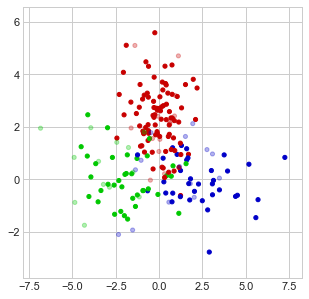

In [66]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
# TRAIN
ax.scatter(x0, x1, s = 17, alpha=1, c=colors )
# TEST
ax.scatter(x0_test, x1_test, s = 17, alpha=0.3, c=colors_test )

ax.figure.canvas.draw()

## Logistic regression (one versus rest)

In [67]:
from sklearn.linear_model import LogisticRegression
clf_3 = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X_train,Y_train)

In [68]:
xx, yy = np.mgrid[x0_range[0]:x0_range[1]:.05, x1_range[0]:x1_range[1]:.05]
X_grid = np.array([xx.flatten(),yy.flatten()]).T
probs_grid = clf_3.predict_proba(X_grid)
colors_grid = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in np.array(150*probs_grid,dtype='int')]

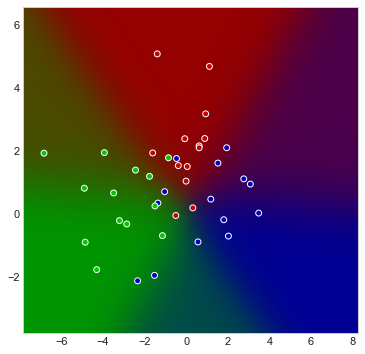

In [69]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
# BACKGROUND OF PROBS
ax.scatter(X_grid[:,0], X_grid[:,1], s = 50, alpha=.2, c=colors_grid )
# TEST
ax.scatter(x0_test, x1_test, s = 35, alpha=1, c=colors_test ,edgecolors = 'white')
ax.figure.canvas.draw()

## Logistic regression (multinomial loss)

In [70]:
from sklearn.linear_model import LogisticRegression
clf_3 = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train,Y_train)

In [71]:
xx, yy = np.mgrid[x0_range[0]:x0_range[1]:.05, x1_range[0]:x1_range[1]:.05]
X_grid = np.array([xx.flatten(),yy.flatten()]).T
probs_grid = clf_3.predict_proba(X_grid)
colors_grid = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in np.array(150*probs_grid,dtype='int')]

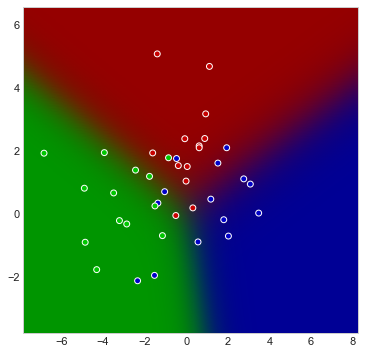

In [72]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
# BACKGROUND OF PROBS
ax.scatter(X_grid[:,0], X_grid[:,1], s = 50, alpha=.2, c=colors_grid )
# TEST
ax.scatter(x0_test, x1_test, s = 35, alpha=1, c=colors_test ,edgecolors = 'white')
ax.figure.canvas.draw()

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf_3 = RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)

In [74]:
xx, yy = np.mgrid[x0_range[0]:x0_range[1]:.05, x1_range[0]:x1_range[1]:.05]
X_grid = np.array([xx.flatten(),yy.flatten()]).T
probs_grid = clf_3.predict_proba(X_grid)
colors_grid = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in np.array(150*probs_grid,dtype='int')]

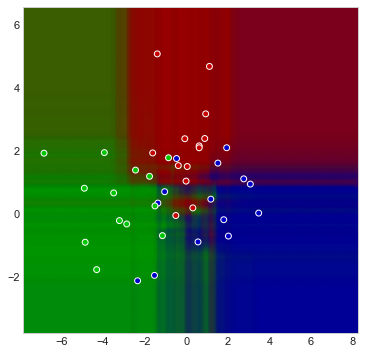

In [75]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(x0_range)
ax.set_ylim(x1_range)
# BACKGROUND OF PROBS
ax.scatter(X_grid[:,0], X_grid[:,1], s = 50, alpha=.2, c=colors_grid )
# TEST
ax.scatter(x0_test, x1_test, s = 35, alpha=1, c=colors_test ,edgecolors = 'white')
ax.figure.canvas.draw()